# Investigations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from IPython.display import Image

## Data overview

**The data consists of two folders, Patient_1 and Patient_2 each containing interictal, preictal, and test sequences (.mat files) corresponding to channels x time matrices.**

* For Patient_1, each sequence has 15 channels (15 electrodes)
* For Patient_2, each sequence has 24 channels (24 electrodes)

* The preictal segements are recorded 65 minutes before a seizure
* The interictal segments are recorded 4 hours before or after a seizure

## Quick data visualization

In [3]:
patient_1_II_df = pd.read_csv('../raw_data/Patient_1_csv/train_segments_unlabelled/interictal_segment_19.csv')
patient_1_II2_df = pd.read_csv('../raw_data/Patient_1_csv/train_segments_unlabelled/interictal_segment_15.csv')
patient_2_II_df = pd.read_csv('../raw_data/Patient_2_csv/train_segments_unlabelled/interictal_segment_19.csv')

In [4]:
patient_1_PI_df = pd.read_csv('../raw_data/Patient_1_csv/train_segments_unlabelled/preictal_segment_18.csv')
patient_1_PI2_df = pd.read_csv('../raw_data/Patient_1_csv/train_segments_unlabelled/preictal_segment_15.csv')
patient_2_PI_df = pd.read_csv('../raw_data/Patient_2_csv/train_segments_unlabelled/interictal_segment_18.csv')

(-10.0, 400.0)

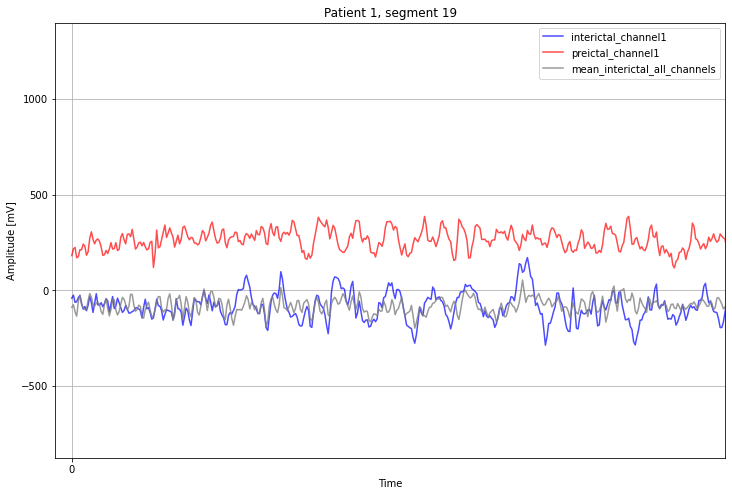

In [6]:
plt.figure(figsize=(12,8))
plt.plot(patient_1_II_df.loc[0], color = 'blue', label = 'interictal_channel1', alpha = 0.7)
plt.plot(patient_1_PI_df.loc[0], color = 'red', label = 'preictal_channel1', alpha = 0.7)
plt.plot(patient_1_II_df.mean(), color = 'grey', label = 'mean_interictal_all_channels', alpha = 0.8)
plt.legend()
plt.xticks(ticks=[0,10000, 20000, 30000])
plt.xlabel('Time')
plt.ylabel('Amplitude [mV]')
plt.grid()
plt.title('Patient 1, segment 19');
plt.xlim(-10,400)

(300.0, 400.0)

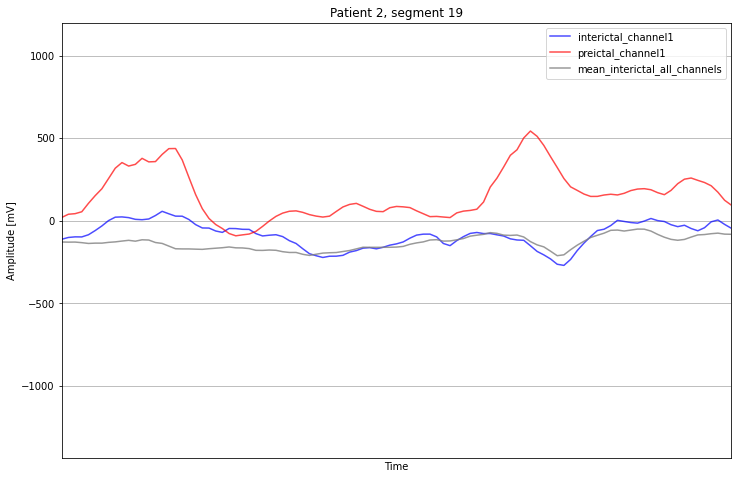

In [42]:
plt.figure(figsize=(12,8))
plt.plot(patient_2_II_df.loc[0], color = 'blue', label = 'interictal_channel1', alpha = 0.7)
plt.plot(patient_2_PI_df.loc[0], color = 'red', label = 'preictal_channel1', alpha = 0.7)
plt.plot(patient_2_II_df.mean(), color = 'grey', label = 'mean_interictal_all_channels', alpha = 0.8)
plt.legend()
plt.xticks(ticks=[])
plt.xlabel('Time')
plt.ylabel('Amplitude [mV]')
plt.grid()
plt.title('Patient 2, segment 19');
plt.xlim(300,400)

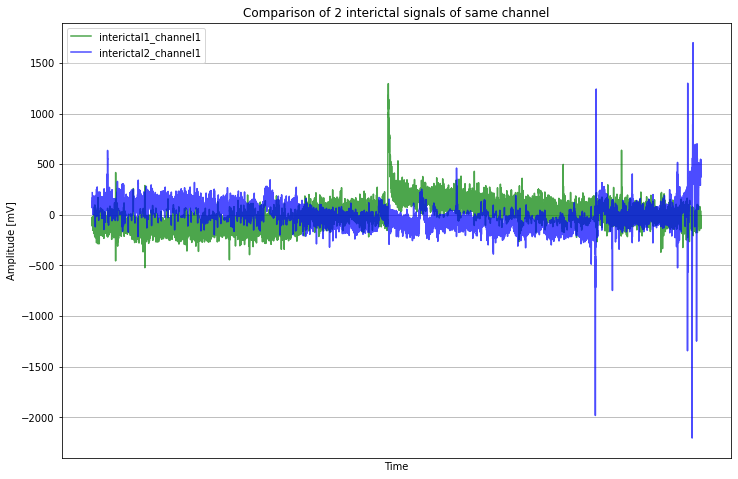

In [50]:
plt.figure(figsize=(12,8))
plt.plot(patient_1_II_df.loc[0], color = 'green', label = 'interictal1_channel1', alpha = 0.7)
plt.plot(patient_1_II2_df.loc[0], color = 'blue', label = 'interictal2_channel1', alpha = 0.7)
plt.legend()
plt.xticks(ticks=[])
plt.xlabel('Time')
plt.ylabel('Amplitude [mV]')
plt.title('Comparison of 2 interictal signals of same channel')
plt.grid();

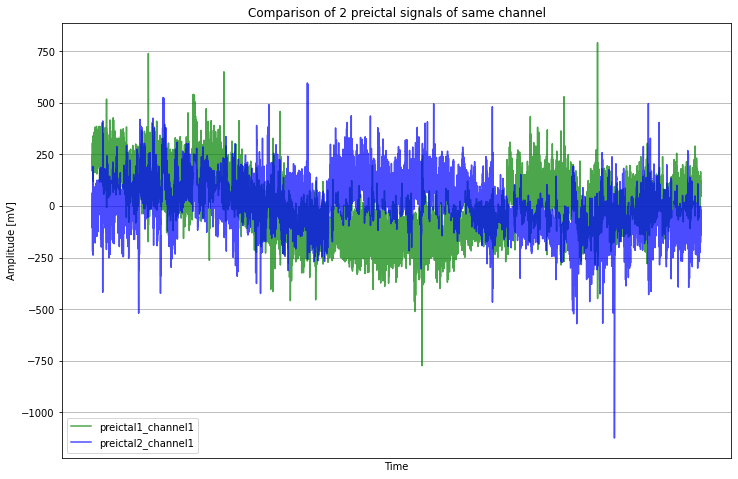

In [51]:
plt.figure(figsize=(12,8))
plt.plot(patient_1_PI_df.loc[0], color = 'green', label = 'preictal1_channel1', alpha = 0.7)
plt.plot(patient_1_PI2_df.loc[0], color = 'blue', label = 'preictal2_channel1', alpha = 0.7)
plt.legend()
plt.xticks(ticks=[])
plt.xlabel('Time')
plt.ylabel('Amplitude [mV]')
plt.title('Comparison of 2 preictal signals of same channel')
plt.grid();

## Data scaling

In [52]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaler.fit(patient_1_II_df)
transformed = scaler.transform(patient_1_II_df)

In [59]:
transformed_df = pd.DataFrame(transformed)

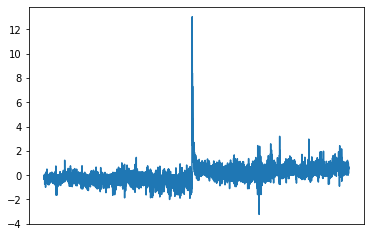

In [60]:
plt.plot(transformed_df.loc[0])
plt.xticks(ticks=[]);

## Data reduction

In this section, several data reduction techniques are investigated:

* Dimension reduction using PCA (can the number of channels be reduced?)
* Signal downsampling (can we reduce the number of data points while preserving the signal statistics?)

### PCA for dimension reduction

* Can we consider each channel separately?
* Should we apply channel-selection algorithms?
* Should we make a model for each channel?

### Signal downsampling for data points reduction

## Metrics of similarity

**This challenge aims to classify whether an iEEG is preictal or interictal.**

**But what are the metric(s) that assess if two time series are similar?**

Several options:
* Cross-correlation
* Discrete Wavelength Transform
* Discrete Fourrier Transform
* Mahalanobis distance
* Minkowski distance
* Euclidian distance between two points
* Dynamic Time Warping
* Mutual information
* Motif Discovery and associated iSAX
* Correlation dimension (https://github.com/jcvasquezc/Corr_Dim)

## Overfitting strategies

**Possible ways to avoid/limit overfitting on Patients:**
* Train model to maximize Loss function on Patient feature